In [2]:
import numpy as np
import curvedsky
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import matplotlib as mpl

In [3]:
class bin1D(object):
    def __init__(self, ls, bin_edges):
        self.centers = (bin_edges[1:]+bin_edges[:-1])/2.
        self.digitized = np.digitize(ls, bin_edges,right=True)
        self.bin_edges = bin_edges
    def bin(self,data1d,weights=None):
        if weights is None:
            res = np.bincount(self.digitized,(data1d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
        else:
            res = np.bincount(self.digitized,(data1d*weights).reshape(-1))[1:-1]/np.bincount(self.digitized,weights.reshape(-1))[1:-1]
        return self.centers,res

In [4]:
Lmax = 3000
Ls = np.arange(0, Lmax+1)
mpl.rcParams['font.size']=12

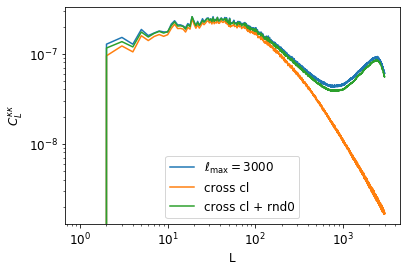

In [5]:
ellmaxs = [3000, 4000]
ellmaxs = [3000]
rdn0_set = [0,1,2,3]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = []
    for rdn0 in rdn0_set:
        reckap_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_CMB_S3/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                          for i in range(0,10)]])   
        reckap_cls.append(np.mean(reckap_clss, axis=0))
    
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    # reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    # reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    ## plt.plot(Ls, clkk, label='theory')
    plt.plot(Ls, reckap_cl[:,0][Ls], label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)
    # plt.plot(Ls, reckap_rot_cl[:,0][Ls], label='reckap rot cl')
    plt.plot(Ls, reckap_cl[:,1][Ls], label='cross cl')
    plt.plot(Ls, reckap_cl[:,1][Ls]+reckap_cl[:,2][Ls], label='cross cl + rnd0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


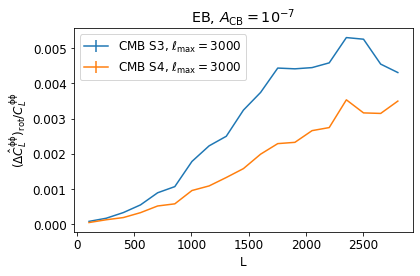

In [10]:
ellmaxs = [3000]
experiments = ['CMB_S3', 'CMB_S4']
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    for experiment in experiments:
        
        reckap_cls = []
        reckap_rot_cls = []
        for rdn0 in rdn0_set:
            reckap_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_cls.append(np.mean(reckap_clss, axis=0))

            reckap_rot_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_rot_cls.append(np.mean(reckap_rot_clss, axis=0))
        
        
        reckap_cls = np.array(reckap_cls)
        reckap_rot_cls = np.array(reckap_rot_cls)
        bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]))/clkk[:Lmax+1]
        bias_mean = np.mean(bias, axis=0)
        bias_err = np.std(bias, axis=0)

        bin_edge = np.arange(30, Lmax, 150)
        binner = bin1D(Ls, bin_edge)

        L_bin, bias_mean_bin = binner.bin(bias_mean)
        L_bin, bias_err_bin = binner.bin(bias_err)
        
        if experiment=='CMB_S3':
            plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label='CMB S3, '+r'$\ell_{\mathrm{max}}=%s$'%ellmax)
        if experiment=='CMB_S4':
            plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label='CMB S4, '+r'$\ell_{\mathrm{max}}=%s$'%ellmax)
        # plt.plot(L_bin, bias_mean_bin, label='CMB S3, ' + r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
plt.title('EB, '+r'$A_{\mathrm{CB}}=10^{-7}$')
plt.legend()
plt.tight_layout()
# plt.savefig('bias_10E-7.png')
# plt.savefig('bias_10E-7.pdf')

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


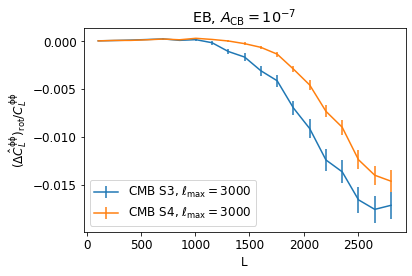

In [39]:
ellmaxs = [3000]
experiments = ['CMB_S3', 'CMB_S4']
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    for experiment in experiments:
        
        reckap_cls = []
        reckap_rot_cls = []
        for rdn0 in rdn0_set:
            reckap_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_cls.append(np.mean(reckap_clss, axis=0))

            reckap_rot_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_rot_cls.append(np.mean(reckap_rot_clss, axis=0))
        
        
        reckap_cls = np.array(reckap_cls)
        reckap_rot_cls = np.array(reckap_rot_cls)
        bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]) - (reckap_rot_cls[:,:Lmax+1,2] - reckap_cls[:,:Lmax+1,2]))/clkk[:Lmax+1]
        bias_mean = np.mean(bias, axis=0)
        bias_err = np.std(bias, axis=0)

        bin_edge = np.arange(30, Lmax, 150)
        binner = bin1D(Ls, bin_edge)

        L_bin, bias_mean_bin = binner.bin(bias_mean)
        L_bin, bias_err_bin = binner.bin(bias_err)
        
        if experiment=='CMB_S3':
            plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label='CMB S3, '+r'$\ell_{\mathrm{max}}=%s$'%ellmax)
        if experiment=='CMB_S4':
            plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label='CMB S4, '+r'$\ell_{\mathrm{max}}=%s$'%ellmax)
        # plt.plot(L_bin, bias_mean_bin, label='CMB S3, ' + r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
plt.title('EB, '+r'$A_{\mathrm{CB}}=10^{-7}$')
plt.legend()
plt.tight_layout()
plt.savefig('bias_10E-7.png')
plt.savefig('bias_10E-7.pdf')

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


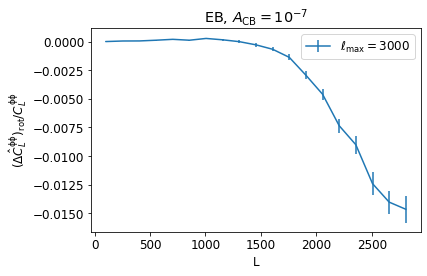

In [37]:
ellmaxs = [3000]
experiments = ['CMB_S4']
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    for experiment in experiments:
        
        reckap_cls = []
        reckap_rot_cls = []
        for rdn0 in rdn0_set:
            reckap_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_cls.append(np.mean(reckap_clss, axis=0))

            reckap_rot_clss = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps_{experiment}/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_{rdn0}_30_{ellmax}.csv' \
                                                              for i in range(0,9)]])   
            reckap_rot_cls.append(np.mean(reckap_rot_clss, axis=0))
        
        
        reckap_cls = np.array(reckap_cls)
        reckap_rot_cls = np.array(reckap_rot_cls)
        bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]) - (reckap_rot_cls[:,:Lmax+1,2] - reckap_cls[:,:Lmax+1,2]))/clkk[:Lmax+1]
        bias_mean = np.mean(bias, axis=0)
        bias_err = np.std(bias, axis=0)

        bin_edge = np.arange(30, Lmax, 150)
        binner = bin1D(Ls, bin_edge)

        L_bin, bias_mean_bin = binner.bin(bias_mean)
        L_bin, bias_err_bin = binner.bin(bias_err)
        plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)
        # plt.plot(L_bin, bias_mean_bin, label='CMB S4, ' + r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
plt.title('EB, '+r'$A_{\mathrm{CB}}=10^{-7}$')
plt.legend()
plt.tight_layout()
plt.savefig('bias_10E-7.png')
plt.savefig('bias_10E-7.pdf')